In [54]:
import warnings
warnings.filterwarnings('ignore')

In [55]:
#import dependencies
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter

In [57]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
##

In [58]:
import sqlalchemy 
import pandas

In [ ]:
# import all necesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
%matplotlib inline
import seaborn as sns
import calendar
import plotly as pt
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from pylab import *
import matplotlib.patheffects as PathEffects

from itertools import product
from scipy.spatial.distance import pdist, squareform

import warnings
warnings.filterwarnings('ignore')

In [59]:
#### DB Connection configuration
username = "postgres"
password = "usaccident"
endpoint = "us-accident.cnnhjjyro1tm.us-east-1.rds.amazonaws.com"  # something like amazonaws.com:5432
dbname   = "US_Accident"

In [60]:
## Connect to Db
con = sqlalchemy.create_engine("postgresql://%s:%s@%s/%s" % (username, password, endpoint, dbname))

In [61]:
## Get Data
accident_df = pandas.read_sql("select * from clean_accident_data;", con)
#print(accident_df)

## US Accident Analysis 

In [63]:
accident_df.head()

,index,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Street,Side,...,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Year,Month,Day,Hour,Weekday,time_duration
0,0,1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,3.230,Outerbelt E,R,...,False,False,False,Night,2016,Feb,8,0,Mon,360.0
1,1,5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,0.500,I-75 S,R,...,False,False,False,Day,2016,Feb,8,7,Mon,360.0
2,2,8,2,2016-02-08 11:51:46,2016-02-08 17:51:46,41.375310,-81.820170,0.521,I-71 S,R,...,False,False,False,Day,2016,Feb,8,11,Mon,360.0
3,3,10,2,2016-02-08 15:16:43,2016-02-08 21:16:43,40.109310,-82.968490,0.826,Outerbelt W,R,...,False,False,False,Day,2016,Feb,8,15,Mon,360.0
4,4,11,2,2016-02-08 15:43:50,2016-02-08 21:43:50,39.192880,-84.477230,0.307,I-75 N,R,...,False,False,False,Day,2016,Feb,8,15,Mon,360.0


In [66]:
print(accident_df.columns)

Index(['index', 'ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'Distance(mi)', 'Street', 'Side', 'City', 'County',
       'State', 'Zipcode', 'Timezone', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Year', 'Month', 'Day', 'Hour',
       'Weekday', 'time_duration'],
      dtype='object')


In [67]:
#drop the non-beneficial columns
#accident_df=accident_df.drop(columns=['ID','End_Time','End_Lat','End_Lng','Description','Side','Airport_Code','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight',"Start_Time",'ID','Weather_Timestamp','Zipcode','Street','Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal','Turning_Loop','Country'])
accident_df=accident_df.drop(columns=['index','ID','Zipcode'])

In [75]:
accident_df.dtypes

Severity               int64
Start_Time            object
End_Time              object
Start_Lat            float64
Start_Lng            float64
Distance(mi)         float64
Street                object
Side                  object
City                  object
County                object
State                 object
Timezone              object
Temperature(F)       float64
Wind_Chill(F)        float64
Humidity(%)          float64
Pressure(in)         float64
Visibility(mi)       float64
Wind_Direction        object
Wind_Speed(mph)      float64
Precipitation(in)    float64
Weather_Condition     object
Amenity                 bool
Bump                    bool
Crossing                bool
Give_Way                bool
Junction                bool
No_Exit                 bool
Railway                 bool
Roundabout              bool
Station                 bool
Stop                    bool
Traffic_Calming         bool
Traffic_Signal          bool
Turning_Loop            bool
Sunrise_Sunset

In [76]:
accident_df['Start_Time'] = pd.to_datetime(accident_df['Start_Time'])

In [77]:
accident_df['End_Time'] = pd.to_datetime(accident_df['End_Time'])

### Top 10 States with most no. of accidents

In [68]:
# create a dictionary using US State code and their corresponding Name
us_states = {'AK': 'Alaska',
 'AL': 'Alabama',
 'AR': 'Arkansas',
 'AS': 'American Samoa',
 'AZ': 'Arizona',
 'CA': 'California',
 'CO': 'Colorado',
 'CT': 'Connecticut',
 'DC': 'District of Columbia',
 'DE': 'Delaware',
 'FL': 'Florida',
 'GA': 'Georgia',
 'GU': 'Guam',
 'HI': 'Hawaii',
 'IA': 'Iowa',
 'ID': 'Idaho',
 'IL': 'Illinois',
 'IN': 'Indiana',
 'KS': 'Kansas',
 'KY': 'Kentucky',
 'LA': 'Louisiana',
 'MA': 'Massachusetts',
 'MD': 'Maryland',
 'ME': 'Maine',
 'MI': 'Michigan',
 'MN': 'Minnesota',
 'MO': 'Missouri',
 'MP': 'Northern Mariana Islands',
 'MS': 'Mississippi',
 'MT': 'Montana',
 'NC': 'North Carolina',
 'ND': 'North Dakota',
 'NE': 'Nebraska',
 'NH': 'New Hampshire',
 'NJ': 'New Jersey',
 'NM': 'New Mexico',
 'NV': 'Nevada',
 'NY': 'New York',
 'OH': 'Ohio',
 'OK': 'Oklahoma',
'OR': 'Oregon',
 'PA': 'Pennsylvania',
 'PR': 'Puerto Rico',
 'RI': 'Rhode Island',
 'SC': 'South Carolina',
 'SD': 'South Dakota',
 'TN': 'Tennessee',
 'TX': 'Texas',
'UT': 'Utah',
 'VA': 'Virginia',
 'VI': 'Virgin Islands',
 'VT': 'Vermont',
 'WA': 'Washington',
 'WI': 'Wisconsin',
 'WV': 'West Virginia',
 'WY': 'Wyoming'}

# create a dataframe of State and their corresponding accident cases
state_df = pd.DataFrame(accident_df['State'].value_counts()).reset_index().rename(columns={'index':'State', 'State':'Cases'})

# Function to convert the State Code with the actual corressponding Name
def convert(x): return us_states[x]

state_df['State'] = state_df['State'].apply(convert)


top_ten_states_name = list(state_df['State'].head(10))

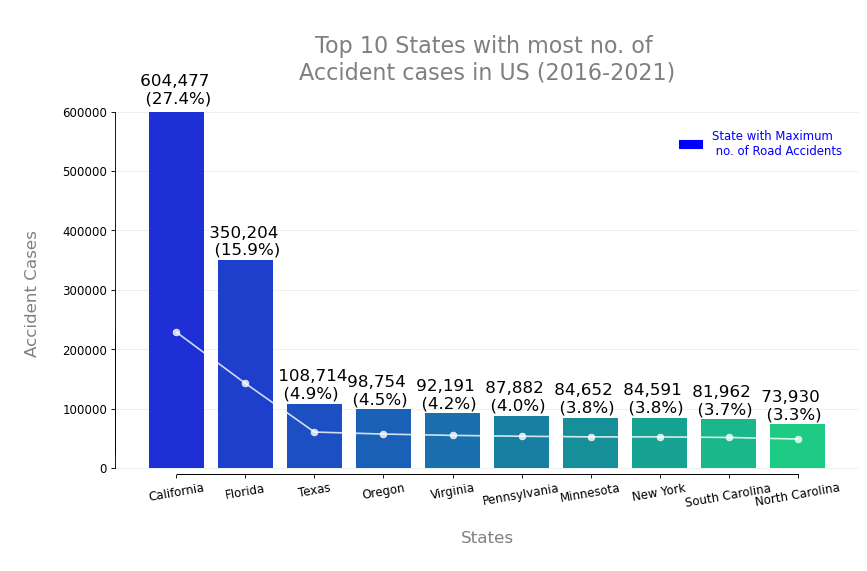

In [92]:
fig, ax = plt.subplots(figsize = (12,6), dpi = 80)

cmap = cm.get_cmap('winter', 10)   
clrs = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]

ax=sns.barplot(y=state_df['Cases'].head(10), x=state_df['State'].head(10), palette='winter')
ax1 = ax.twinx()
sns.lineplot(data = state_df[:10], marker='o', x='State', y='Cases', color = 'white', alpha = .8)


total = accident_df.shape[0]
for i in ax.patches:
    ax.text(i.get_x()-0.2, i.get_height()+10000, \
            ' {:,d}\n  ({}%) '.format(int(i.get_height()), round(100*i.get_height()/total, 1)), fontsize=15,
                color='black')
    
ax.set(ylim =(-10000, 600000))
ax1.set(ylim =(-100000, 1700000))

plt.title('\nTop 10 States with most no. of \nAccident cases in US (2016-2021)\n', size=20, color='grey')
ax1.axes.yaxis.set_visible(False)
ax.set_xlabel('\nStates\n', fontsize=15, color='grey')
ax.set_ylabel('\nAccident Cases\n', fontsize=15, color='grey')

for i in ['top','right']:
    side1 = ax.spines[i]
    side1.set_visible(False)
    side2 = ax1.spines[i]
    side2.set_visible(False)
ax.set_axisbelow(True)
ax.grid(color='#b2d6c7', linewidth=1, axis='y', alpha=.3)

ax.spines['bottom'].set_bounds(0.005, 9)
ax.spines['left'].set_bounds(0, 600000)
ax1.spines['bottom'].set_bounds(0.005, 9)
ax1.spines['left'].set_bounds(0, 600000)
ax.tick_params(axis='y', which='major', labelsize=10.6)
ax.tick_params(axis='x', which='major', labelsize=10.6, rotation=10)

MA = mpatches.Patch(color=clrs[0], label='State with Maximum\n no. of Road Accidents')
ax.legend(handles=[MA], prop={'size': 10.5}, loc='best', borderpad=1, 
          labelcolor=clrs[0], edgecolor='white');    


### Top 10 Accident Prone Streets in US

In [93]:
# create a dataframe of Street and their corresponding accident cases
street_df = pd.DataFrame(accident_df['Street'].value_counts()).reset_index().rename(columns={'index':'Street No.', 'Street':'Cases'})

In [94]:
top_ten_streets_df = pd.DataFrame(street_df.head(10))

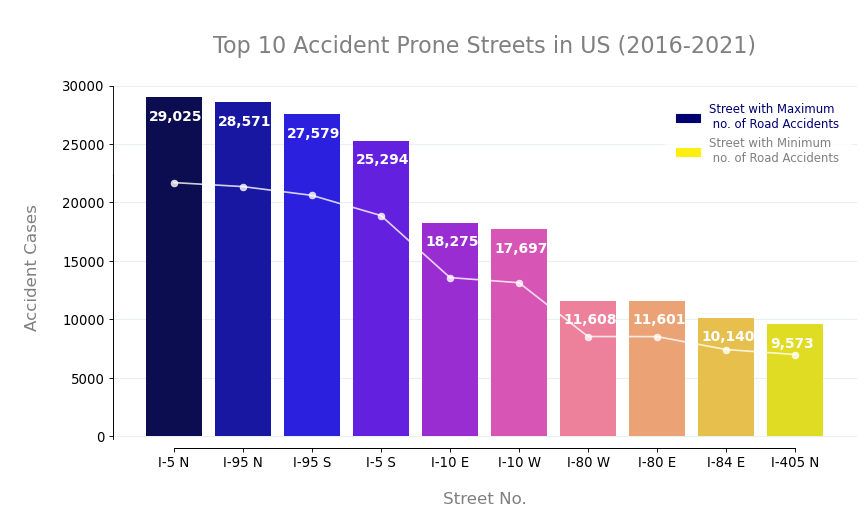

In [95]:
fig, ax = plt.subplots(figsize = (12,6), dpi = 80)
        
cmap = cm.get_cmap('gnuplot2', 10)   
clrs = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]

ax=sns.barplot(y=top_ten_streets_df['Cases'], x=top_ten_streets_df['Street No.'], palette='gnuplot2')
ax1 = ax.twinx()
sns.lineplot(data = top_ten_streets_df, marker='o', x='Street No.', y='Cases', color = 'white', alpha = .8)

total = accident_df.shape[0]
for i in ax.patches:
    ax.text(i.get_x()+0.04, i.get_height()-2000, \
            '{:,d}'.format(int(i.get_height())), fontsize=12.5,weight='bold',
                color='white')
    
ax.axes.set_ylim(-1000, 30000)
ax1.axes.set_ylim(-1000, 40000)
plt.title('\nTop 10 Accident Prone Streets in US (2016-2021)\n', size=20, color='grey')

ax1.axes.yaxis.set_visible(False)
ax.set_xlabel('\nStreet No.\n', fontsize=15, color='grey')
ax.set_ylabel('\nAccident Cases\n', fontsize=15, color='grey')

for i in ['top','right']:
    side1 = ax.spines[i]
    side1.set_visible(False)
    side2 = ax1.spines[i]
    side2.set_visible(False)
    
ax.set_axisbelow(True)
ax.grid(color='#b2d6c7', linewidth=1, axis='y', alpha=.3)

ax.spines['bottom'].set_bounds(0.005, 9)
ax.spines['left'].set_bounds(0, 30000)
ax1.spines['bottom'].set_bounds(0.005, 9)
ax1.spines['left'].set_bounds(0, 30000)
ax.tick_params(axis='both', which='major', labelsize=12)

MA = mpatches.Patch(color=clrs[1], label='Street with Maximum\n no. of Road Accidents')
MI = mpatches.Patch(color=clrs[-2], label='Street with Minimum\n no. of Road Accidents')
ax.legend(handles=[MA, MI], prop={'size': 10.5}, loc='best', borderpad=1, 
          labelcolor=[clrs[1], 'grey'], edgecolor='white');

### Avg accidents per day/per hour

In [96]:
year_df = pd.DataFrame(accident_df.Start_Time.dt.year.value_counts()).reset_index().rename(columns={'index':'Year', 'Start_Time':'Cases'}).sort_values(by='Cases', ascending=True)

In [97]:
year_df['accident/day'] = round(year_df['Cases']/(5*365))

In [98]:
year_df['accident/hour'] = round(year_df['Cases']/(5*365*24))

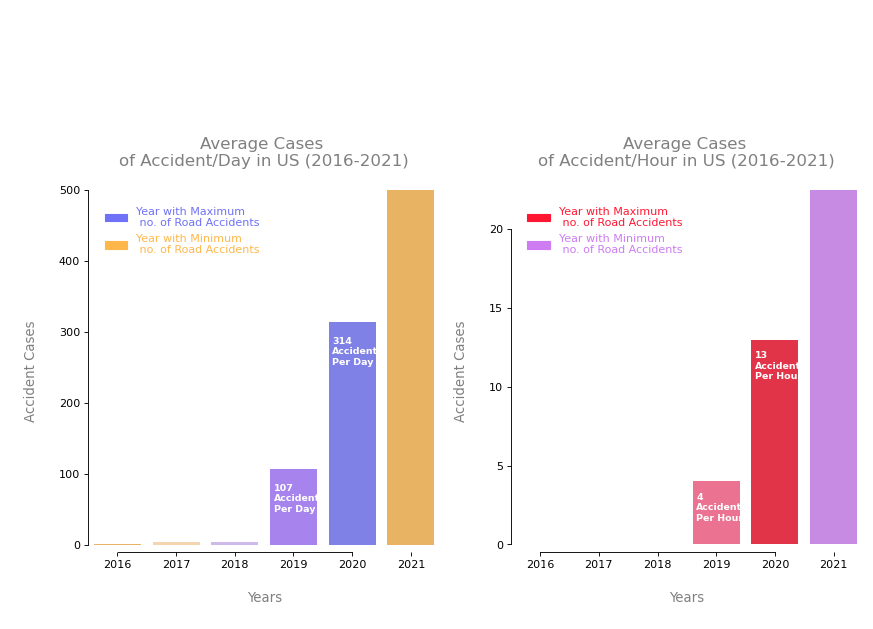

In [99]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12.5,6), dpi = 80)

count = 0
plots = ['accident/day', 'accident/hour']
plots_limit = [(-10, 500), (-0.5, 22.5)]
plots_bound = [(0, 500), (0, 20)]
plot_text = [60, 2.5]

colors = [['#ffb74b', '#ffd6a4', '#ceb1f2', '#a071ff', '#6f71f7'], 
          ['#cd7cf2', '#f27ec8', '#fa70b3', '#ff5e86', '#ff1732']]

for i in [ax1, ax2]:


    sns.barplot(ax=i, y=year_df[plots[count]], x=year_df['Year'], palette=colors[count])
    
    var = plots[count].split('/')[-1].capitalize()
    
    for j in i.patches:
        i.text(j.get_x()+0.06, j.get_height()-plot_text[count], \
                str(int(j.get_height()))+'\nAccidents\nPer {}'.format(var), fontsize=8.5, color='white', weight='bold')

    i.axes.set_ylim(plots_limit[count])
    i.axes.set_ylabel('\nAccident Cases\n', fontsize=12, color='grey')
    i.axes.set_xlabel('\nYears\n', fontsize=12, color='grey')
    i.tick_params(axis='both', which='major', labelsize=10)

    i.set_title('\nAverage Cases \nof Accident/{} in US (2016-2021)\n'.format(var), fontsize =15, color='grey')
    i.spines['bottom'].set_bounds(0.005, 4)
    i.spines['left'].set_bounds(plots_bound[count])

    for k in ['top', 'right']:
            side = i.spines[k]
            side.set_visible(False)

    i.set_axisbelow(True)
    MA = mpatches.Patch(color=colors[count][-1], label='Year with Maximum\n no. of Road Accidents')
    MI = mpatches.Patch(color=colors[count][0], label='Year with Minimum\n no. of Road Accidents')
    i.legend(handles=[MA, MI], prop={'size': 10}, loc='best', borderpad=1, 
          labelcolor=[colors[count][-1], colors[count][0]], edgecolor='white');
    count += 1